In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Added all Libraries
from spectral import *
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
import mpmath as mp

In [3]:
#image stored in arr
img = open_image('f090819t01p00r06rdn_b_sc01_ort_img.hdr')
print img
arr = img.load()
block = []
for i in range(224):
    data = arr[2500:2510,450:460,i].astype(np.float32)
    block.append(data)
print "process complete"
varblock = []
for hg in range(224):
    yog = np.var(block[hg])
    varblock.append(yog)
variance = np.average(varblock)
##### considering 40x40 matrix
block = []
for i in range(224):
    data = arr[2500:2540,450:490,i].astype(np.float32)
    block.append(data)
print "process complete"

	Data Source:   '././f090819t01p00r06rdn_b_sc01_ort_img'
	# Rows:           6955
	# Samples:         781
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16
process complete
process complete


In [4]:
#correlation
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


In [5]:
#Pre-Processing of the hyperspectral image, Hawaii. Using GOA technique
haha = corr.index(min(corr))
print haha

157


In [6]:
#greedy ordering algorithm
rblock = [] #reference block
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(haha)
rblock.append(block1[haha])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = np.corrcoef(rblock[jk].reshape(-1), block1[ijk].reshape(-1))[0][1] #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print "Process Complete"

Process Complete


In [7]:
corrfin = []
for i in range(223):
    corfin = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrfin.append(corfin)
print "process complete"

process complete


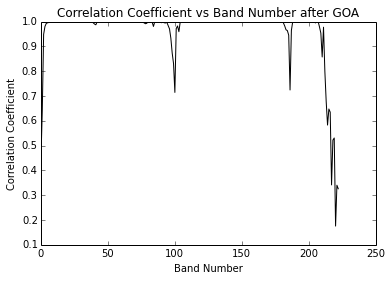

In [8]:
plt.figure(12)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after GOA')
plt.show()

In [9]:
from sklearn.preprocessing import normalize

def normalize(lst):
    s = sum(lst)
    return map(lambda x: float(x)/s, lst)
def norm(array):
    p1 = array.reshape(-1)
    x1 = normalize(p1)
    y1 = np.array(x1).reshape(-1,10)
    return y1

In [10]:
#normalizing each block
rblockn = []
maxblock = []
minblock = []
for q in range(len(rblock)):
    xc = rblock[q]
    maxxc = np.max(xc)
    maxblock.append(maxxc)
    minxc = np.min(xc)
    minblock.append(minxc)
    xcfin = []
    for xci in range(len(xc)):
        for xcj in range(len(xc)):
            xcres = (xc[xci][xcj] - minxc)/(maxxc - minxc) 
            xcfin.append(xcres)
    xcfin1 = np.reshape(xcfin,(40,-1))
    rblockn.append(xcfin1)
print 'Process Complete'

Process Complete


In [11]:
def raster(arr):
    a = arr
    xx = []
    for i in range(10):
        zz = []
        for j in range(10):
            x = float(a[i][j])
            zz.append(x)
        xx.extend(zz)
        del zz
    return xx

In [12]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:10,:10]
    yy = raster(xx)
    finlist = finlist + yy

In [13]:
len(finlist)

22400

In [14]:
finlist = list(finlist)

In [15]:
float(finlist[0])

0.5555555820465088

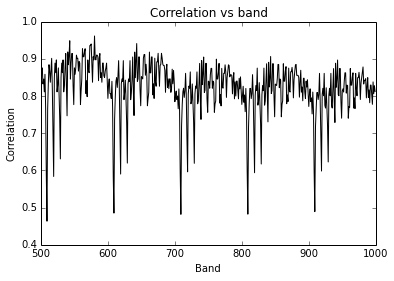

In [16]:
plt.figure(29)
plt.plot(range(500,1000),finlist[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [17]:
from audiolazy import lpc

In [18]:
y = 40 #frame size

In [19]:
finli = map (lambda x: finlist[y*x:(x+1)*y], range (len(finlist)/y)) 

In [20]:
reslpcfin = []
errorframe = []
coefficient = []
lpcfunction = []
lpcerror = []
errorfull = []
for ijk in range(len(finlist)/y):
    lpcframe = lpc(finli[ijk],order=3)
    lpcfunction.append(lpcframe)
    lpcerror.append(lpcframe.error)
    reslpc = list(lpcframe(finli[ijk]))
    reslpcfin.append(reslpc)
    coefficient.append(lpcframe.numerator)
    errorfr = []
    for ijkl in range(len(reslpc)):
        err = finli[ijk][ijkl] - reslpc[ijkl]
        errorfr.append(err)
        errorfull.append(err)
    errorframe.append(errorfr)
    del(errorfr)
    del(reslpc)
    del(lpcframe)
print "process complete"

process complete


In [21]:
from __future__ import with_statement
from __future__ import unicode_literals

import numpy as np
import scipy.cluster
from pylab import *

class codebook(object):

    def __init__(self, input):
        self.__vector = []
        for i in input:
            self.vector.append(np.array(i))
        self.__centroid = 0.0

    def __str__(self):
        return "centroid:" + str(self.__centroid) + " vector_count:" + str(len(self.__vector))

    #The center of the calculation
    @property
    def centroid(self):
        return self.__centroid

    def _get_vector(self):
        return self.__vector

    def _set_vector(self, value):
        self.__vector.append(value)

    def _del_vector(self):
        self.__vector = []

    vector = property(_get_vector, _set_vector, _del_vector)

    def calc_centroid(self, eps = 0.0):
        if len(self.__vector) < 1:
            return False

        c = np.zeros([len(self.__vector[0])])
        for i in self.__vector:
            c += i
        self.__centroid = (c / len(self.__vector))* (1.0 + eps)

        return True



class LBG_splitting(object):
    """LBG+Splitting Algorithm"""

    #Calculation of distortion ( metrics / convergence determination)
    def calc_D(self):
        result = 0.0
        a = []
        for code in self.__codebook:
            center = code.centroid
            for child in code.vector:
                result += np.linalg.norm(center - child)
                a.append(np.linalg.norm(center - child))
        return result , a

    def start(self, N, input1, eps = np.float64(0.00001)):
        delta = np.float64(0.01)
        eps = np.float64(eps)
        #Creating the initial code book / initialization
        self.__codebook = []
        N /= 2
        d = int(len(input1)/N)
        for i in range(N):
            tmp = input1[i*d:(i+1)*d]


            #You want to create a minute of the code book of + delta and -delta
            code = codebook(tmp)
            code.calc_centroid(delta)
            self.__codebook.append(code)

            code = codebook(tmp)
            code.calc_centroid(-1*delta)
            self.__codebook.append(code)

            
        #Strain calculation
        global D
        distort = self.calc_D()
        D = distort[0]
        global distortion
        distortion = []
        distortion.append(distort[1])
        cnt = 0
        
        print "distortion = ", D
        
        #Clustering
        while True:
            #For now , delete the previous results
            for i in self.__codebook:
                del(i.vector)

            #Clustering part
            global position
            position = []
            for vector in input1:
                d = np.finfo(np.float64).max
                pos = -1
                for i in range(len(self.__codebook)):
                    code = self.__codebook[i]
                    tmp = np.linalg.norm(vector - code.centroid)
                    if d >= tmp:
                        d = tmp
                        pos = i
                position.append(pos)
                self.__codebook[pos].vector = vector

            #Recalculation of the median
            temp_codebook = []
            for i in self.__codebook:
                if i.calc_centroid():
                    temp_codebook.append(i)

            self.__codebook = temp_codebook


            #Calculation of metrics
            distort = self.calc_D()
            tmp_D = distort[0]
            distortion.append(distort[1])
            
            if (D - tmp_D) / D <= eps:
                break

            D = tmp_D
            print "distortion = ", D

    @property
    def codebook(self):
        return self.__codebook

In [22]:
N = 512     #The number of Clusters
data = np.array(errorframe)       #Input Data

clustering = LBG_splitting()

clustering.start(N, data)

distortion =  256.075439539
distortion =  51.243468174
distortion =  36.8138620474
distortion =  33.9689505048
distortion =  33.2050846128
distortion =  32.6776144755
distortion =  32.2351553722
distortion =  32.1864887808


In [23]:
np.sum(distortion[0])
dist = D

In [24]:
a = 0
for i in range(len(clustering.codebook)):
    a = len(clustering.codebook[i].vector) + a
print a

560


In [25]:
len(position)

560

In [26]:
clustering.codebook[position[2]].centroid

array([ 0.        ,  0.43569377,  0.55667962,  0.68025936,  0.67040832,
        0.64167989,  0.56729503,  0.46241248,  0.50099197,  0.45887401,
        0.57360759,  0.63637218,  0.49467939,  0.5027612 ,  0.53148965,
        0.46064324,  0.57360759,  0.49114092,  0.57537683,  0.63637218,
        0.56729503,  0.66210545,  0.82572675,  0.82276154,  0.85567694,
        0.6062416 ,  0.59549106,  0.6372568 ,  0.5309872 ,  0.53704853,
        0.6130566 ,  0.69304543,  0.66411083,  0.58677583,  0.61571046,
        0.58412198,  0.34340185,  0.40865935,  0.63933735,  0.4980718 ])

In [27]:
position1 = position[:]

In [28]:
errordecode = []
for ik in position:
    abcde = list(clustering.codebook[ik].centroid)
    errordecode.append(abcde)

In [29]:
errordecode1 = errordecode[:]

In [30]:
errorminus = []
for i in range(len(errordecode)):
    ret = np.array(errorframe[i]) - np.array(errordecode[i])
    errorminus.append(list(ret))
    

In [31]:
errorminus1 = errorminus[:]

In [32]:
del(distortion)

In [ ]:
from __future__ import with_statement
from __future__ import unicode_literals

import numpy as np
import scipy.cluster
from pylab import *

class codebook(object):

    def __init__(self, input):
        self.__vector = []
        for i in input:
            self.vector.append(np.array(i))
        self.__centroid = 0.0

    def __str__(self):
        return "centroid:" + str(self.__centroid) + " vector_count:" + str(len(self.__vector))

    #The center of the calculation
    @property
    def centroid(self):
        return self.__centroid

    def _get_vector(self):
        return self.__vector

    def _set_vector(self, value):
        self.__vector.append(value)

    def _del_vector(self):
        self.__vector = []

    vector = property(_get_vector, _set_vector, _del_vector)

    def calc_centroid(self, eps = 0.0):
        if len(self.__vector) < 1:
            return False

        c = np.zeros([len(self.__vector[0])])
        for i in self.__vector:
            c += i
        self.__centroid = (c / len(self.__vector))* (1.0 + eps)

        return True



class LBG_splitting(object):
    """LBG+Splitting Algorithm"""

    #Calculation of distortion ( metrics / convergence determination)
    def calc_D(self):
        result = 0.0
        a = []
        for code in self.__codebook:
            center = code.centroid
            for child in code.vector:
                result += np.linalg.norm(center - child)
                a.append(np.linalg.norm(center - child))
        return result , a

    def start(self, N, input1, eps = np.float64(0.00001)):
        delta = np.float64(0.01)
        eps = np.float64(eps)
        #Creating the initial code book / initialization
        self.__codebook = []
        N /= 2
        d = int(len(input1)/N)
        for i in range(N):
            tmp = input1[i*d:(i+1)*d]


            #You want to create a minute of the code book of + delta and -delta
            code = codebook(tmp)
            code.calc_centroid(delta)
            self.__codebook.append(code)

            code = codebook(tmp)
            code.calc_centroid(-1*delta)
            self.__codebook.append(code)

            
        #Strain calculation
        global D
        distort = self.calc_D()
        D = distort[0]
        global distortion
        distortion = []
        distortion.append(distort[1])
        cnt = 0
        
        print "distortion = ", D
        
        #Clustering
        while True:
            #For now , delete the previous results
            for i in self.__codebook:
                del(i.vector)

            #Clustering part
            global position
            position = []
            for vector in input1:
                d = np.finfo(np.float64).max
                pos = -1
                for i in range(len(self.__codebook)):
                    code = self.__codebook[i]
                    tmp = np.linalg.norm(vector - code.centroid)
                    if d >= tmp:
                        d = tmp
                        pos = i
                position.append(pos)
                self.__codebook[pos].vector = vector

            #Recalculation of the median
            temp_codebook = []
            for i in self.__codebook:
                if i.calc_centroid():
                    temp_codebook.append(i)

            self.__codebook = temp_codebook


            #Calculation of metrics
            distort = self.calc_D()
            tmp_D = distort[0]
            distortion.append(distort[1])
            
            if (D - tmp_D) / D <= eps:
                break

            D = tmp_D
            print "distortion = ", D

    @property
    def codebook(self):
        return self.__codebook

In [ ]:
N = 512     #The number of Clusters
data = np.array(errorminus)       #Input Data

clustering = LBG_splitting()

clustering.start(N, data)

distortion =  35.8797480665
distortion =  8.75719340105
distortion =  5.59416651694
distortion =  5.22659714101
distortion = 

In [ ]:
dist = D

In [ ]:
dist

In [ ]:
errordecode = []
for ik in position:
    abcde = list(clustering.codebook[ik].centroid)
    errordecode.append(abcde)

In [ ]:
errordecode2 = errordecode[:]

In [ ]:
errorminus = []
for i in range(len(errordecode)):
    ret = np.array(errorminus1[i]) - np.array(errordecode[i])
    errorminus.append(list(ret))

In [ ]:
errorminus2 = errorminus[:]

In [ ]:
position2 = position[:]

In [ ]:
del(distortion)

In [ ]:
from __future__ import with_statement
from __future__ import unicode_literals

import numpy as np
import scipy.cluster
from pylab import *

class codebook(object):

    def __init__(self, input):
        self.__vector = []
        for i in input:
            self.vector.append(np.array(i))
        self.__centroid = 0.0

    def __str__(self):
        return "centroid:" + str(self.__centroid) + " vector_count:" + str(len(self.__vector))

    #The center of the calculation
    @property
    def centroid(self):
        return self.__centroid

    def _get_vector(self):
        return self.__vector

    def _set_vector(self, value):
        self.__vector.append(value)

    def _del_vector(self):
        self.__vector = []

    vector = property(_get_vector, _set_vector, _del_vector)

    def calc_centroid(self, eps = 0.0):
        if len(self.__vector) < 1:
            return False

        c = np.zeros([len(self.__vector[0])])
        for i in self.__vector:
            c += i
        self.__centroid = (c / len(self.__vector))* (1.0 + eps)

        return True



class LBG_splitting(object):
    """LBG+Splitting Algorithm"""

    #Calculation of distortion ( metrics / convergence determination)
    def calc_D(self):
        result = 0.0
        a = []
        for code in self.__codebook:
            center = code.centroid
            for child in code.vector:
                result += np.linalg.norm(center - child)
                a.append(np.linalg.norm(center - child))
        return result , a

    def start(self, N, input1, eps = np.float64(0.00001)):
        delta = np.float64(0.01)
        eps = np.float64(eps)
        #Creating the initial code book / initialization
        self.__codebook = []
        N /= 2
        d = int(len(input1)/N)
        for i in range(N):
            tmp = input1[i*d:(i+1)*d]


            #You want to create a minute of the code book of + delta and -delta
            code = codebook(tmp)
            code.calc_centroid(delta)
            self.__codebook.append(code)

            code = codebook(tmp)
            code.calc_centroid(-1*delta)
            self.__codebook.append(code)

            
        #Strain calculation
        global D
        distort = self.calc_D()
        D = distort[0]
        global distortion
        distortion = []
        distortion.append(distort[1])
        cnt = 0
        
        print "distortion = ", D
        
        #Clustering
        while True:
            #For now , delete the previous results
            for i in self.__codebook:
                del(i.vector)

            #Clustering part
            global position
            position = []
            for vector in input1:
                d = np.finfo(np.float64).max
                pos = -1
                for i in range(len(self.__codebook)):
                    code = self.__codebook[i]
                    tmp = np.linalg.norm(vector - code.centroid)
                    if d >= tmp:
                        d = tmp
                        pos = i
                position.append(pos)
                self.__codebook[pos].vector = vector

            #Recalculation of the median
            temp_codebook = []
            for i in self.__codebook:
                if i.calc_centroid():
                    temp_codebook.append(i)

            self.__codebook = temp_codebook


            #Calculation of metrics
            distort = self.calc_D()
            tmp_D = distort[0]
            distortion.append(distort[1])
            
            if (D - tmp_D) / D <= eps:
                break

            D = tmp_D
            print "distortion = ", D

    @property
    def codebook(self):
        return self.__codebook

In [ ]:
N = 512     #The number of Clusters
data = np.array(errorminus)       #Input Data

clustering = LBG_splitting()

clustering.start(N, data)

In [ ]:
dist = D
dist

In [ ]:
errordecode = []
for ik in position:
    abcde = list(clustering.codebook[ik].centroid)
    errordecode.append(abcde)

In [ ]:
errordecode[:] = errordecode[:]

In [ ]:
errorminus = []
for i in range(len(errordecode)):
    ret = np.array(errorminus2[i]) - np.array(errordecode[i])
    errorminus.append(list(ret))

In [ ]:
errorminus3 = errorminus[:]

In [ ]:
position3 = position[:]

In [ ]:
huffcodebook = position

In [ ]:
len(position)

In [ ]:
from heapq import heappush, heappop, heapify
from collections import defaultdict
 
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
 
txt = "this is an example for huffman encoding"
symb2freq = defaultdict(int)
for ch in huffcodebook:
    symb2freq[ch] += 1
# in Python 3.1+:
# symb2freq = collections.Counter(txt)
huff = encode(symb2freq)
print "Symbol\tWeight\tHuffman Code"
huffsymbol = []
hufffreq = []
for p in huff:
    huffsymbol.append(p[1])
    hufffreq.append(symb2freq[p[0]])
    #print "%s\t%s\t%s" % (p[0], symb2freq[p[0]], p[1])

In [ ]:
lenhuff = []
for i in range(len(huffsymbol)):
    yo = huffsymbol[i]
    x = str(yo)
    ya = x.lstrip('0')
    lenhuff.append(len(ya)*hufffreq[i])
print sum(lenhuff)

In [ ]:
cr = float(len(finlist)*16)/sum(lenhuff)
print cr

In [ ]:
#BPP
bpp = sum(lenhuff)/22400.00
print bpp

In [ ]:
len(errordecode)

In [ ]:
errorfinfin = np.array(errorminus2) + np.array(errordecode2) + np.array(errordecode1)

In [ ]:
del(errordecode)

In [ ]:
errordecode = errorfinfin[:]

In [ ]:
print coefficient[0]
print "---"
print lpcerror[0]
print "---"
print lpcfunction[0] #h
print "---"
print finli[0] #x
print "---"
print reslpcfin[0] #y
print "---"
print errordecode[0] #e

In [ ]:
from scipy.signal import lfilter

In [ ]:
estx = []

In [ ]:
estx.append(reslpcfin[0][0]+errordecode[0][0])

In [ ]:
estx

In [ ]:
esty = list(lpcfunction[0](estx))

In [ ]:
esty

In [ ]:
len(lpcfunction)

In [ ]:
estx = []
esty = []
for iq in range(len(errordecode)):
    estx1 = []
    esty1 = []
    for iw in range(len(errordecode[iq])):
        estx1.append(reslpcfin[iq][iw]+errordecode[iq][iw])
        esty1 = list(lpcfunction[iq](estx1))
    esty.append(esty1)
    estx.append(estx1)

In [ ]:
print estx[0]
print finli[0]

In [ ]:
print esty[0]
print reslpcfin[0]

In [ ]:
estxfin = []
for yi in estx:
    for yu in yi:
        estxfin.append(yu)

In [ ]:
y = 100
estxfin1 = map (lambda x: estxfin[y*x:(x+1)*y], range (len(finlist)/y)) 

In [ ]:
blockfin = []
for iji in estxfin1:
    bloc = np.reshape(iji,[10, 10])
    blockfin.append(bloc)

In [ ]:
len(maxblock)

In [ ]:
finblockfin = []
for i in range(len(blockfin)):
    eega = blockfin[i]
    eegamax = np.max(eega)
    eegamin = np.min(eega)
    oldmax = maxblock[i]
    oldmin = minblock[i]
    eegvalue = []
    for j in range(len(eega)):
        for k in range(len(eega)):
            ee = ((eega[j][k] - eegamin)*(oldmax - oldmin))/(eegamax - eegamin)
            eee = ee  + oldmin
            eegvalue.append(eee)
    fblock = np.reshape(eegvalue, [10,10])
    finblockfin.append(fblock)
print "Process Complete"

In [ ]:
finblockfin[0]

In [ ]:
rblock5 = []
for i in range(len(rblock)):
    a = rblock[i]
    ab = a[:10,:10]
    rblock5.append(ab)

In [ ]:
aaa = []
for i in range(10):
    for j in range(10):
        aa = rblock[0][i][j][0]
        aaa.append(aa)

In [ ]:
psnr = []
mse = []
snr = []
snrr = []
for i in range(224):
    aq = rblock5[i]
    aw = finblockfin[i]
    subtr = []
    squ = []
    for j in range(10):
        for k in range(10):
            sub = (aq[j][k] - aw[j][k])**2
            subtr.append(sub)
            squ1 = aq[j][k]**2
            squ.append(squ1)
    mse1 = np.sum(subtr)/100.0
    mse.append(mse1)
    psnr1 = 10*np.log10(65536**2/mse1)
    p = 0.01*sum(squ)
    snr1 = 10*log10(p/mse1)
    snrr.append(20*np.log10(100.0/(mse1**0.5)))
    snr.append(snr1)
    psnr.append(psnr1)
print "process complete"

In [ ]:
for i in range(20):
    a = psnr.index(inf)
    psnr[a] = 104

In [ ]:
psnr1 = np.average(psnr)

In [ ]:
sdr = 10*np.log10(variance**2/dist)

In [ ]:
plt.figure(80)
plt.plot(range(224),psnr, 'k')
plt.xlabel('Band Number')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Band Number')
plt.show()

In [ ]:
print 'cr = ', cr
print 'bpp= ', bpp
print 'sdr= ', sdr
print 'psnr= ', psnr1
print 'dist= ',dist